# Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
articles = pd.read_csv('../data/articles.csv')
customers = pd.read_csv('../data/customers.csv')
sample_submisison = pd.read_csv('../data/sample_submission.csv')
transactions = pd.read_csv('../data/transactions_train.csv')

## Articles
Start with EDA on article.csv

In [7]:
# visualize
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

### Missing values

In [3]:
total_articles = articles.shape[0]
print('Total articles:', total_articles)
for column in articles.columns.to_list():
    print(f'{(articles[column].isna().sum() / total_articles) * 100}% have no {column}')
# conclusion: no missing values except in te detail_desc column: 0.004% of all values are missing
# --> Negotiable

Total articles: 105542
0.0% have no article_id
0.0% have no product_code
0.0% have no prod_name
0.0% have no product_type_no
0.0% have no product_type_name
0.0% have no product_group_name
0.0% have no graphical_appearance_no
0.0% have no graphical_appearance_name
0.0% have no colour_group_code
0.0% have no colour_group_name
0.0% have no perceived_colour_value_id
0.0% have no perceived_colour_value_name
0.0% have no perceived_colour_master_id
0.0% have no perceived_colour_master_name
0.0% have no department_no
0.0% have no department_name
0.0% have no index_code
0.0% have no index_name
0.0% have no index_group_no
0.0% have no index_group_name
0.0% have no section_no
0.0% have no section_name
0.0% have no garment_group_no
0.0% have no garment_group_name
0.3941558810710428% have no detail_desc


### Intuitive sense
For article: only for name attributes

In [50]:
def count_unknown_undefined(col):
    unknown_undefined = ['unknown', 'Unknown', 'undefined', 'Undefined']
    result = []
    for value in unknown_undefined:
        if value in articles[col].value_counts().index:
            result.append(str(articles[col].value_counts()[value]))
        else:
            result.append(str(0))
    result = [": ".join(value) for value in zip(unknown_undefined, result)]
    return ", ".join(result)

In [18]:
articles['prod_name'].describe()

count              105542
unique              45875
top       Dragonfly dress
freq                   98
Name: prod_name, dtype: object

In [16]:
articles['prod_name'].unique()

array(['Strap top', 'Strap top (1)', 'OP T-shirt (Idro)', ...,
       'Cartwheel dress', 'CLAIRE HAIR CLAW', 'Lounge dress'],
      dtype=object)

In [37]:
print(count_unknown_undefined(col="prod_name"))

unknown: 0, Unknown: 0, undefined: 0, Undefined: 0


In [19]:
articles['product_type_name'].describe()

count       105542
unique         131
top       Trousers
freq         11169
Name: product_type_name, dtype: object

In [15]:
articles['product_type_name'].unique()
# TODO: compare with garment_name, section_name, garment_group_name

array(['Vest top', 'Bra', 'Underwear Tights', 'Socks', 'Leggings/Tights',
       'Sweater', 'Top', 'Trousers', 'Hair clip', 'Umbrella',
       'Pyjama jumpsuit/playsuit', 'Bodysuit', 'Hair string', 'Unknown',
       'Hoodie', 'Sleep Bag', 'Hair/alice band', 'Belt', 'Boots',
       'Bikini top', 'Swimwear bottom', 'Underwear bottom', 'Swimsuit',
       'Skirt', 'T-shirt', 'Dress', 'Hat/beanie', 'Kids Underwear top',
       'Shorts', 'Shirt', 'Cap/peaked', 'Pyjama set', 'Sneakers',
       'Sunglasses', 'Cardigan', 'Gloves', 'Earring', 'Bag', 'Blazer',
       'Other shoe', 'Jumpsuit/Playsuit', 'Sandals', 'Jacket', 'Costumes',
       'Robe', 'Scarf', 'Coat', 'Other accessories', 'Polo shirt',
       'Slippers', 'Night gown', 'Alice band', 'Straw hat', 'Hat/brim',
       'Tailored Waistcoat', 'Necklace', 'Ballerinas', 'Tie',
       'Pyjama bottom', 'Felt hat', 'Bracelet', 'Blouse',
       'Outdoor overall', 'Watch', 'Underwear body', 'Beanie', 'Giftbox',
       'Sleeping sack', 'Dungarees',

In [38]:
print(count_unknown_undefined(col="product_type_name"))

unknown: 0, Unknown: 121, undefined: 0, Undefined: 0


In [21]:
articles['product_group_name'].describe()

count                 105542
unique                    19
top       Garment Upper body
freq                   42741
Name: product_group_name, dtype: object

In [14]:
articles['product_group_name'].unique()
# compare to section number?

array(['Garment Upper body', 'Underwear', 'Socks & Tights',
       'Garment Lower body', 'Accessories', 'Items', 'Nightwear',
       'Unknown', 'Underwear/nightwear', 'Shoes', 'Swimwear',
       'Garment Full body', 'Cosmetic', 'Interior textile', 'Bags',
       'Furniture', 'Garment and Shoe care', 'Fun', 'Stationery'],
      dtype=object)

In [39]:
print(count_unknown_undefined(col="product_group_name"))

unknown: 0, Unknown: 121, undefined: 0, Undefined: 0


In [22]:
articles['graphical_appearance_name'].describe()

count     105542
unique        30
top        Solid
freq       49747
Name: graphical_appearance_name, dtype: object

In [13]:
articles['graphical_appearance_name'].unique()

array(['Solid', 'Stripe', 'All over pattern', 'Melange', 'Transparent',
       'Metallic', 'Application/3D', 'Denim', 'Colour blocking', 'Dot',
       'Other structure', 'Contrast', 'Treatment', 'Check', 'Chambray',
       'Front print', 'Glittering/Metallic', 'Mixed solid/pattern',
       'Placement print', 'Other pattern', 'Neps', 'Embroidery', 'Lace',
       'Jacquard', 'Unknown', 'Argyle', 'Slub', 'Mesh', 'Sequin',
       'Hologram'], dtype=object)

In [40]:
print(count_unknown_undefined(col="graphical_appearance_name"))

unknown: 0, Unknown: 52, undefined: 0, Undefined: 0


In [23]:
articles['colour_group_name'].describe()

count     105542
unique        50
top        Black
freq       22670
Name: colour_group_name, dtype: object

In [41]:
articles['colour_group_name'].unique()

array(['Black', 'White', 'Off White', 'Light Beige', 'Beige', 'Grey',
       'Light Blue', 'Light Grey', 'Dark Blue', 'Dark Grey', 'Pink',
       'Dark Red', 'Greyish Beige', 'Light Orange', 'Silver', 'Gold',
       'Light Pink', 'Dark Pink', 'Yellowish Brown', 'Blue',
       'Light Turquoise', 'Yellow', 'Greenish Khaki', 'Dark Yellow',
       'Other Pink', 'Dark Purple', 'Red', 'Transparent', 'Dark Green',
       'Other Red', 'Turquoise', 'Dark Orange', 'Other', 'Orange',
       'Dark Beige', 'Other Yellow', 'Light Green', 'Other Orange',
       'Purple', 'Light Red', 'Light Yellow', 'Green', 'Light Purple',
       'Dark Turquoise', 'Other Purple', 'Bronze/Copper',
       'Other Turquoise', 'Other Green', 'Other Blue', 'Unknown'],
      dtype=object)

In [35]:
print(count_unknown_undefined(col='colour_group_name'))

unknown: 0, Unknown: 28, undefined: 0, Undefined: 0


In [24]:
articles['perceived_colour_value_name'].describe()

count     105542
unique         8
top         Dark
freq       42706
Name: perceived_colour_value_name, dtype: object

<AxesSubplot:>

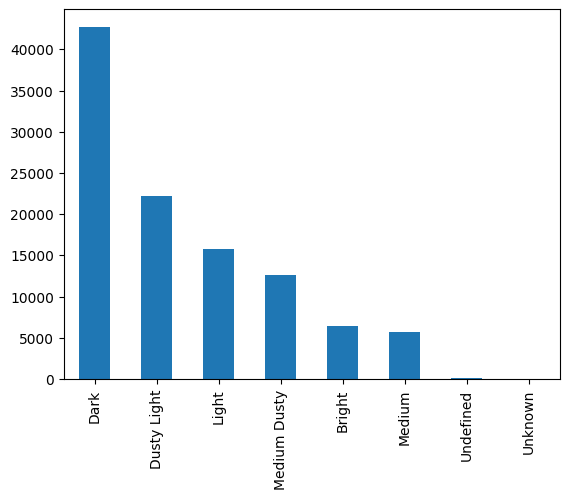

In [32]:
articles['perceived_colour_value_name'].value_counts().plot.bar()
# unknown - undefined?

In [43]:
print(count_unknown_undefined(col='perceived_colour_value_name'))

unknown: 0, Unknown: 28, undefined: 0, Undefined: 105


In [25]:
articles['perceived_colour_master_name'].describe()

count     105542
unique        20
top        Black
freq       22585
Name: perceived_colour_master_name, dtype: object

In [7]:
articles['perceived_colour_master_name'].unique()
# undefined vs unknown

array(['Black', 'White', 'Beige', 'Grey', 'Blue', 'Pink', 'Lilac Purple',
       'Red', 'Mole', 'Orange', 'Metal', 'Brown', 'Turquoise', 'Yellow',
       'Khaki green', 'Green', 'undefined', 'Unknown', 'Yellowish Green',
       'Bluish Green'], dtype=object)

In [44]:
print(count_unknown_undefined(col='perceived_colour_master_name'))

unknown: 0, Unknown: 685, undefined: 105, Undefined: 0


In [26]:
articles['department_name'].describe()

count     105542
unique       250
top       Jersey
freq        4604
Name: department_name, dtype: object

In [6]:
articles['department_name'].unique()
# some "inactive from s-" included

array(['Jersey Basic', 'Clean Lingerie', 'Tights basic', 'Baby basics',
       'Casual Lingerie', 'Jersey', 'EQ & Special Collections',
       'Hair Accessories', 'Other items', 'Baby Nightwear',
       'Men Sport Woven', 'Men Sport Bottoms', 'Kids Boy Denim',
       'Shopbasket Socks', 'Socks', 'UW', 'Young Girl Jersey Basic',
       'Jacket Street', 'Belts', 'Divided Shoes', 'Swimwear',
       'Underwear Jersey', 'Basic 1', 'Tops Knitwear DS', 'Men Sport Acc',
       'Kids Boy Jersey Basic', 'Young Girl UW/NW', 'Shirt', 'Nightwear',
       'Trouser', 'Small Accessories', 'Sunglasses', 'Gloves/Hats',
       'Knit & Woven', 'Basics', 'Accessories', 'Jewellery',
       'Jersey Fancy DS', 'Trousers DS', 'Bags', 'Blazer S&T', 'Knitwear',
       'Woven bottoms', 'Shorts', 'Dresses DS', 'Expressive Lingerie',
       'Kids Girl UW/NW', 'Young Boy Jersey Basic', 'Kids Girl S&T',
       'Young Girl S&T', 'Shoes / Boots inactive from s5', 'Nursing',
       'Jersey Fancy', 'Shoes', 'Functional L

In [45]:
print(count_unknown_undefined(col='department_name'))

unknown: 0, Unknown: 0, undefined: 0, Undefined: 0


In [27]:
articles['index_name'].describe()

count         105542
unique            10
top       Ladieswear
freq           26001
Name: index_name, dtype: object

<AxesSubplot:>

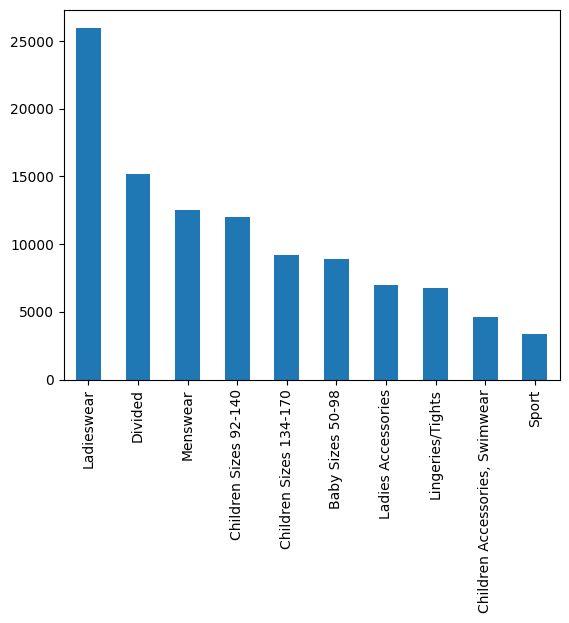

In [33]:
articles['index_name'].value_counts().plot.bar()

In [46]:
print(count_unknown_undefined(col='index_name'))

unknown: 0, Unknown: 0, undefined: 0, Undefined: 0


In [28]:
articles['index_group_name'].describe()

count         105542
unique             5
top       Ladieswear
freq           39737
Name: index_group_name, dtype: object

<AxesSubplot:>

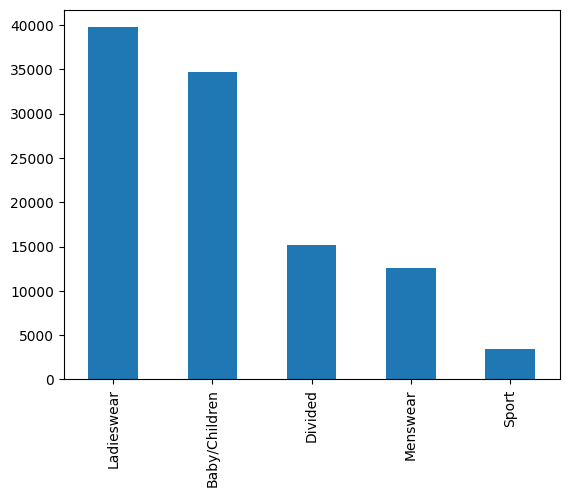

In [34]:
articles['index_group_name'].value_counts().plot.bar()

In [40]:
articles['index_name_group_name'] = articles.apply(lambda row: row.index_name + ' | ' + row.index_group_name, axis=1)

<AxesSubplot:>

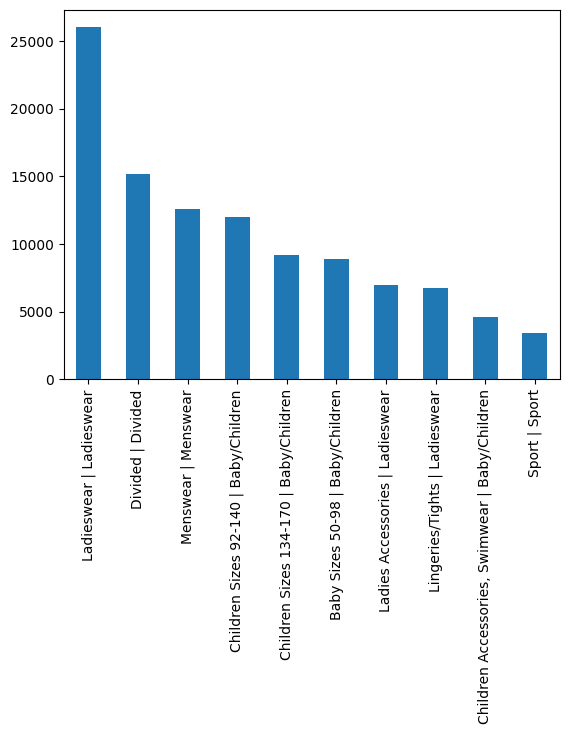

In [41]:
articles['index_name_group_name'].value_counts().plot.bar()

In [47]:
print(count_unknown_undefined(col='index_group_name'))

unknown: 0, Unknown: 0, undefined: 0, Undefined: 0


In [29]:
articles['section_name'].describe()

count                         105542
unique                            56
top       Womens Everyday Collection
freq                            7295
Name: section_name, dtype: object

In [4]:
articles['section_name'].unique()

array(['Womens Everyday Basics', 'Womens Lingerie',
       'Womens Nightwear, Socks & Tigh', 'Baby Essentials & Complements',
       'Men Underwear', 'Mama', 'Womens Small accessories',
       'Men H&M Sport', 'Kids Boy', 'Divided Basics',
       'Girls Underwear & Basics', 'Mens Outerwear',
       'Womens Big accessories', 'Divided Accessories',
       'Womens Swimwear, beachwear', 'Divided Selected',
       'Boys Underwear & Basics', 'Contemporary Street',
       'Contemporary Casual', 'Men Accessories', 'Men Suits & Tailoring',
       'Womens Everyday Collection', 'Men Shoes', 'Young Boy', 'H&M+',
       'Divided Collection', 'Ladies Denim', 'Contemporary Smart',
       'Womens Trend', 'Kids Outerwear', 'Young Girl', 'Womens Shoes',
       'Womens Tailoring', 'Divided Projects', 'Denim Men', 'Men Other',
       'Womens Jackets', 'Men Other 2', 'Baby Boy', 'Womens Casual',
       'Kids Accessories, Swimwear & D', 'Ladies H&M Sport',
       'Kids & Baby Shoes', 'Baby Girl', 'Kids Girl

In [69]:
print(count_unknown_undefined(col='section_name'))

unknown: 0, Unknown: 0, undefined: 0, Undefined: 0


In [87]:
articles['index_name_group_name'] = articles.apply(lambda row: row.index_group_name + ' | ' + row.index_name + ' | ' + row.section_name, axis=1)
result = articles['index_name_group_name'].value_counts()
result = result.index.tolist()
result = [x.split(' | ') for x in  result]
index_group_names = list(set([x[0] for x in result]))
dictionary = {
    key: {} for key in index_group_names
}
for element in result:
    if element[1] not in dictionary[element[0]].keys():
        dictionary[element[0]][element[1]] = [element[2]]
    else:
        dictionary[element[0]][element[1]].append(element[2])

for index_group_name in dictionary.keys():
    print(index_group_name)
    for index_name in dictionary[index_group_name].keys():
        print('\t', index_name)
        print('\t\t', ", ".join(dictionary[index_group_name][index_name]))

Baby/Children
	 Baby Sizes 50-98
		 Baby Essentials & Complements, Baby Girl, Baby Boy, Kids & Baby Shoes, Kids Local Relevance
	 Children Sizes 92-140
		 Kids Girl, Kids Boy, Girls Underwear & Basics, Boys Underwear & Basics, Kids Outerwear, Kids Local Relevance
	 Children Sizes 134-170
		 Young Girl, Young Boy, Girls Underwear & Basics, Boys Underwear & Basics, Kids Outerwear
	 Children Accessories, Swimwear
		 Kids Accessories, Swimwear & D, Kids & Baby Shoes, Kids Outerwear
Divided
	 Divided
		 Divided Collection, Divided Projects, Divided Accessories, Divided Basics, Divided Selected, Ladies Denim, Divided Asia keys, Divided Complements Other, EQ Divided
Ladieswear
	 Ladieswear
		 Womens Everyday Collection, Womens Tailoring, Womens Casual, Womens Trend, H&M+, Mama, Womens Everyday Basics, Womens Premium, Womens Jackets, Special Collections, Collaborations, Womens Nightwear, Socks & Tigh, Ladies Denim, Ladies Other
	 Lingeries/Tights
		 Womens Lingerie, Womens Swimwear, beachwear,

In [30]:
articles['garment_group_name'].describe()

count           105542
unique              21
top       Jersey Fancy
freq             21445
Name: garment_group_name, dtype: object

In [3]:
articles['garment_group_name'].unique()

array(['Jersey Basic', 'Under-, Nightwear', 'Socks and Tights',
       'Jersey Fancy', 'Accessories', 'Trousers Denim', 'Outdoor',
       'Shoes', 'Swimwear', 'Knitwear', 'Shirts', 'Trousers', 'Dressed',
       'Shorts', 'Dresses Ladies', 'Skirts', 'Special Offers', 'Blouses',
       'Unknown', 'Woven/Jersey/Knitted mix Baby', 'Dresses/Skirts girls'],
      dtype=object)

In [49]:
print(count_unknown_undefined(col='garment_group_name'))

unknown: 0, Unknown: 3873, undefined: 0, Undefined: 0


In [57]:
len(articles[(articles['product_type_name'] == 'Unknown') | (articles['product_group_name'] == 'Unknown')].index)

121

In [58]:
len(articles[(articles['colour_group_name'] == 'Unknown') | (articles['perceived_colour_value_name'] == 'Unknown')].index)

28

In [59]:
len(articles[(articles['perceived_colour_value_name'] == 'Undefined') | (articles['perceived_colour_master_name'] == 'Undefined')].index)

105

In [91]:
print(f'unique article id\'s: {articles["article_id"].unique().shape[0]}, total_articles: {total_articles}')

unique article id's: 105542, total_articles: 105542


In [119]:
def print_link_info(column1, column2):
    subset = articles[[column1, column2]].copy()
    subset = subset.drop_duplicates()
    result1 = subset[column1].value_counts()
    result1.value_counts()
    result2 = subset[column2].value_counts()
    result2.value_counts()
    print(column1)
    print(result1.value_counts())
    print()
    print(column2)
    print(result2.value_counts())

In [120]:
print_link_info(column1='product_code', column2='prod_name')

product_code
1    45048
2     1842
3      268
4       54
5       12
Name: product_code, dtype: int64

prod_name
1    42803
2     2472
3      419
4      128
5       32
6       13
7        6
8        2
Name: prod_name, dtype: int64


In [121]:
print_link_info(column1='product_type_no', column2='product_type_name')

product_type_no
1    132
Name: product_type_no, dtype: int64

product_type_name
1    130
2      1
Name: product_type_name, dtype: int64


In [123]:
print_link_info(column1='graphical_appearance_no', column2='graphical_appearance_name')

graphical_appearance_no
1    30
Name: graphical_appearance_no, dtype: int64

graphical_appearance_name
1    30
Name: graphical_appearance_name, dtype: int64


In [124]:
print_link_info(column1='colour_group_code', column2='colour_group_name')

colour_group_code
1    50
Name: colour_group_code, dtype: int64

colour_group_name
1    50
Name: colour_group_name, dtype: int64


In [125]:
print_link_info(column1='perceived_colour_value_id', column2='perceived_colour_value_name')

perceived_colour_value_id
1    8
Name: perceived_colour_value_id, dtype: int64

perceived_colour_value_name
1    8
Name: perceived_colour_value_name, dtype: int64


In [126]:
print_link_info(column1='perceived_colour_master_id', column2='perceived_colour_master_name')

perceived_colour_master_id
1    20
Name: perceived_colour_master_id, dtype: int64

perceived_colour_master_name
1    20
Name: perceived_colour_master_name, dtype: int64


In [127]:
print_link_info(column1='department_no', column2='department_name')

department_no
1    299
Name: department_no, dtype: int64

department_name
1     228
2      13
3       3
5       2
4       2
11      1
7       1
Name: department_name, dtype: int64


In [130]:
print_link_info(column1='index_code', column2='index_name')

index_code
1    10
Name: index_code, dtype: int64

index_name
1    10
Name: index_name, dtype: int64


In [129]:
print_link_info(column1='index_group_no', column2='index_group_name')

index_group_no
1    5
Name: index_group_no, dtype: int64

index_group_name
1    5
Name: index_group_name, dtype: int64


In [131]:
print_link_info(column1='section_no', column2='section_name')

section_no
1    57
Name: section_no, dtype: int64

section_name
1    55
2     1
Name: section_name, dtype: int64


In [132]:
print_link_info(column1='garment_group_no', column2='garment_group_name')

garment_group_no
1    21
Name: garment_group_no, dtype: int64

garment_group_name
1    21
Name: garment_group_name, dtype: int64


## Customers
Continue with EDA on customer.csv

In [133]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [4]:
total_customers = customers.shape[0]
print('Total customers:', total_customers)
for column in customers.columns.to_list():
    print(f'{(customers[column].isna().sum() / total_customers) * 100}% have no {column}')

Total customers: 1371980
0.0% have no customer_id
65.23783145526903% have no FN
66.15081852505138% have no Active
0.44184317555649494% have no club_member_status
1.1668537442236768% have no fashion_news_frequency
1.1560664149623172% have no age
0.0% have no postal_code


In [20]:
customers['club_member_status'].describe()

count     1365918
unique          3
top        ACTIVE
freq      1272491
Name: club_member_status, dtype: object

<AxesSubplot:>

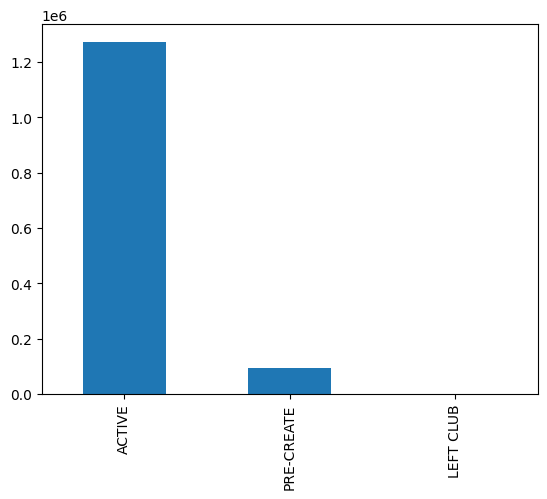

In [24]:
customers['club_member_status'].value_counts().plot.bar()

In [13]:
def count_unknown_undefined_customers(col):
    unknown_undefined = ['unknown', 'Unknown', 'undefined', 'Undefined']
    result = []
    for value in unknown_undefined:
        if value in customers[col].value_counts().index:
            result.append(str(customers[col].value_counts()[value]))
        else:
            result.append(str(0))
    result = [": ".join(value) for value in zip(unknown_undefined, result)]
    return ", ".join(result)

In [151]:
print(count_unknown_undefined_customers(col='club_member_status'))

unknown: 0, Unknown: 0, undefined: 0, Undefined: 0


In [22]:
customers['fashion_news_frequency'].describe()

count     1355971
unique          4
top          NONE
freq       877711
Name: fashion_news_frequency, dtype: object

<AxesSubplot:>

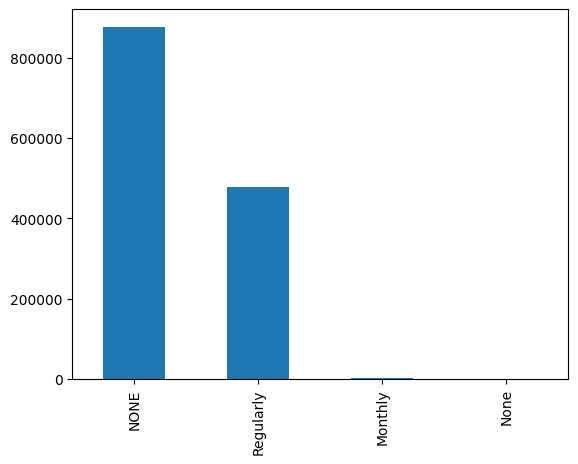

In [26]:
customers['fashion_news_frequency'].value_counts().plot.bar()
# NONE vs None

In [152]:
print(count_unknown_undefined_customers(col='fashion_news_frequency'))

unknown: 0, Unknown: 0, undefined: 0, Undefined: 0


In [159]:
customers['age'].describe()
# 16 to 99, mean 36, standard deviation 14

count    1.356119e+06
mean     3.638696e+01
std      1.431363e+01
min      1.600000e+01
25%      2.400000e+01
50%      3.200000e+01
75%      4.900000e+01
max      9.900000e+01
Name: age, dtype: float64

In [158]:
len(customers['age'].unique().tolist())

85

<AxesSubplot:>

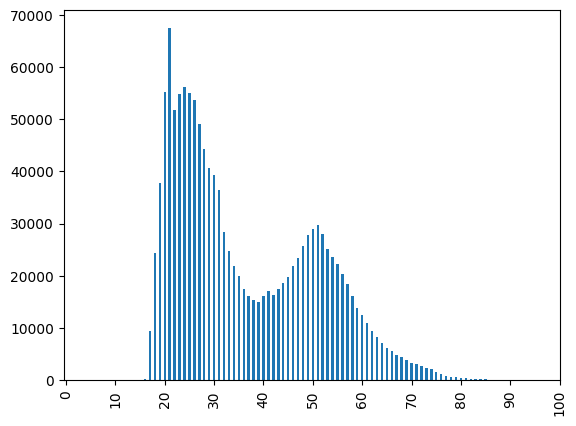

In [23]:
value_counts = customers['age'].value_counts()
for i in range(int(min(customers["age"]))):
    value_counts[float(i)] = 0
value_counts.sort_index().plot.bar(xticks=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

In [160]:
print(count_unknown_undefined_customers(col='age'))

unknown: 0, Unknown: 0, undefined: 0, Undefined: 0


In [33]:
customers['postal_code'].describe()

count                                               1371980
unique                                               352899
top       2c29ae653a9282cce4151bd87643c907644e09541abc28...
freq                                                 120303
Name: postal_code, dtype: object

In [34]:
customers['postal_code'].unique()
# postal code encoded ??

array(['52043ee2162cf5aa7ee79974281641c6f11a68d276429a91f8ca0d4b6efa8100',
       '2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93f4c830291c32bc3057',
       '64f17e6a330a85798e4998f62d0930d14db8db1c054af6c9090f7dd3e38380dc',
       ...,
       'c9d6890a6a194925f2c7712bde35b4ea973971cbe27c993ee907fe6d97a3ab0c',
       'c9e32043e0338a51dfd94705cfd8f75eb98c2ec34730497c9726b21e59ee4572',
       '0a1a03306fb2f62164c2a439b38c0caa64b40deaae868799ccb93ac69444b79d'],
      dtype=object)

In [161]:
print(count_unknown_undefined_customers(col='postal_code'))

unknown: 0, Unknown: 0, undefined: 0, Undefined: 0


In [11]:
customers['FN']

0          NaN
1          NaN
2          NaN
3          NaN
4          1.0
          ... 
1371975    NaN
1371976    NaN
1371977    1.0
1371978    1.0
1371979    NaN
Name: FN, Length: 1371980, dtype: float64

In [15]:
customers['FN'].nunique()

1

In [14]:
print(count_unknown_undefined_customers(col='FN'))

unknown: 0, Unknown: 0, undefined: 0, Undefined: 0


In [16]:
customers['Active']

0          NaN
1          NaN
2          NaN
3          NaN
4          1.0
          ... 
1371975    NaN
1371976    NaN
1371977    1.0
1371978    1.0
1371979    NaN
Name: Active, Length: 1371980, dtype: float64

In [17]:
customers['Active'].nunique()

1

In [18]:
print(count_unknown_undefined_customers(col='Active'))

unknown: 0, Unknown: 0, undefined: 0, Undefined: 0


In [43]:
print(f'unique customer id\'s: {customers["customer_id"].unique().shape[0]}, total_customers: {total_customers}')

unique customer id's: 1371980, total_customers: 1371980


## Transactions

In [5]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [22]:
total_transactions = transactions.shape[0]
print('Total transactions:', total_transactions)
for column in transactions.columns.to_list():
    print(f'{(transactions[column].isna().sum() / total_transactions)*100}% have no {column}')

Total transactions: 31788324
0.0% have no t_dat
0.0% have no customer_id
0.0% have no article_id
0.0% have no price
0.0% have no sales_channel_id


In [7]:
transactions['t_dat'].describe()

count       31788324
unique           734
top       2019-09-28
freq          198622
Name: t_dat, dtype: object

In [8]:
transactions['t_dat'].min()

'2018-09-20'

In [9]:
transactions['t_dat'].max()

'2020-09-22'

<AxesSubplot:>

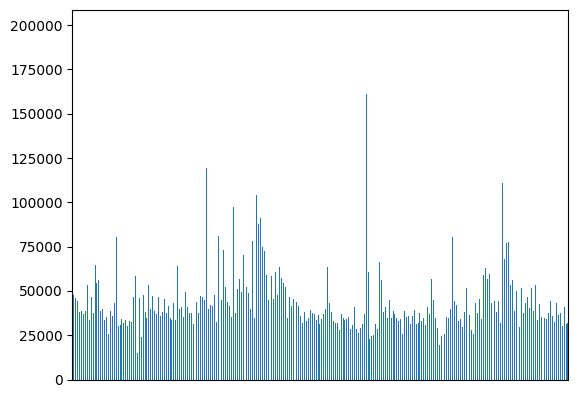

In [16]:
value_counts = transactions['t_dat'].value_counts()
# for i in range(int(min(transactions["age"]))):
#     value_counts[float(i)] = 0
value_counts.sort_index().plot.bar(xticks=[])

In [19]:
value_counts.sort_values(ascending=False)

2019-09-28    198622
2020-04-11    162799
2019-11-29    160875
2018-11-23    142018
2018-09-29    141700
               ...  
2019-01-01     18145
2018-09-22     17635
2018-12-25     14799
2019-12-25     13637
2020-01-01     12760
Name: t_dat, Length: 734, dtype: int64

In [35]:
def count_unknown_undefined_transactions(col):
    unknown_undefined = ['unknown', 'Unknown', 'undefined', 'Undefined', 'none', 'None']
    result = []
    for value in unknown_undefined:
        if value in transactions[col].value_counts().index:
            result.append(str(transactions[col].value_counts()[value]))
        else:
            result.append(str(0))
    result = [": ".join(value) for value in zip(unknown_undefined, result)]
    return ", ".join(result)

In [36]:
print(count_unknown_undefined_transactions(col='t_dat'))

unknown: 0, Unknown: 0, undefined: 0, Undefined: 0, none: 0, None: 0


In [20]:
transactions['price'].describe()

count    3.178832e+07
mean     2.782927e-02
std      1.918113e-02
min      1.694915e-05
25%      1.581356e-02
50%      2.540678e-02
75%      3.388136e-02
max      5.915254e-01
Name: price, dtype: float64

In [24]:
# value_counts = transactions['price'].value_counts()
# value_counts.sort_index()
transactions['price'].min()

1.694915254237288e-05

In [25]:
transactions['price'].max()

0.5915254237288136

In [37]:
print(count_unknown_undefined_transactions(col='price'))

unknown: 0, Unknown: 0, undefined: 0, Undefined: 0, none: 0, None: 0


In [42]:
transactions['customer_id'].describe()

count                                              31788324
unique                                              1362281
top       be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...
freq                                                   1895
Name: customer_id, dtype: object

In [48]:
mean_purchases_per_user = transactions['customer_id'].count() / transactions['customer_id'].nunique()
print('Mean # transactions per user:', mean_purchases_per_user)

Mean purchases per user: 23.334630667241193


In [54]:
print(f'min # transactions {transactions["customer_id"].value_counts().min()}, min # transactions {transactions["customer_id"].value_counts().max()}')

min # transactions 1, min # transactions 1895


In [58]:
result = []
for i in range(0, 1900, 100):
    result.append(i)
print(result)

[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800]


In [64]:
bins = pd.cut(transactions['customer_id'].value_counts().value_counts(), bins=result)
print(bins)

1                NaN
2                NaN
3                NaN
4                NaN
5                NaN
            ...     
681     (0.0, 100.0]
684     (0.0, 100.0]
685     (0.0, 100.0]
686     (0.0, 100.0]
1895    (0.0, 100.0]
Name: customer_id, Length: 747, dtype: category
Categories (18, interval[int64, right]): [(0, 100] < (100, 200] < (200, 300] < (300, 400] ... (1400, 1500] < (1500, 1600] < (1600, 1700] < (1700, 1800]]


In [63]:
transactions['customer_id'].value_counts().value_counts()

1       131514
2       127441
3        95686
4        82082
5        64635
         ...  
681          1
684          1
685          1
686          1
1895         1
Name: customer_id, Length: 747, dtype: int64

<AxesSubplot:>

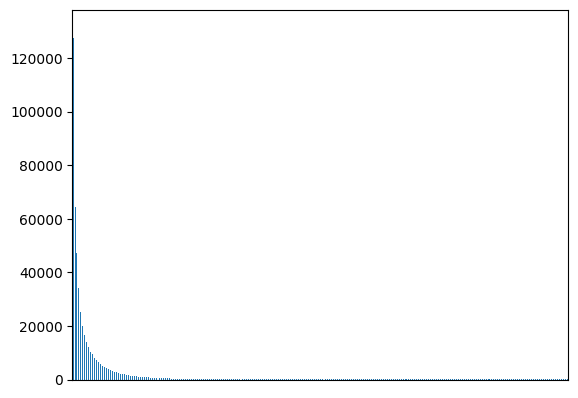

In [66]:
# bins = pd.cut(transactions['customer_id'].value_counts().value_counts(), bins=result)
transactions['customer_id'].value_counts().value_counts().plot.bar(xticks=[])

In [73]:
transactions['customer_id'].value_counts().describe()

count    1.362281e+06
mean     2.333463e+01
std      3.924225e+01
min      1.000000e+00
25%      3.000000e+00
50%      9.000000e+00
75%      2.700000e+01
max      1.895000e+03
Name: customer_id, dtype: float64

In [19]:
occ = customers['customer_id'].append(transactions['customer_id']).value_counts()
users = occ[occ > 1].index
print(users)

/tmp/ipykernel_66140/518155450.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  occ = customers['customer_id'].append(transactions['customer_id']).value_counts()


Index(['be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b',
       'b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71',
       '49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f',
       'a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc',
       'cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6',
       '55d15396193dfd45836af3a6269a079efea339e875eff42cc0c228b002548a9d',
       'c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27cf9bda5517c8774f8fa',
       '8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076',
       '03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296',
       '6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2e57161f0ef810a4b55',
       ...
       '8f722caf098ff12d7da4272bb8b30df08f79603d7d08ad44f6a5483679c93acf',
       'dd458c15e8332278214431a458a038140bfe51b6dadadc21f5ccb2cc03ba3730',
       'de87e2c4e6d34487db6cd8c1bd0edc83f3e99299e4ec7242413babf645f51359',
       'dd457a

In [21]:
print(f"{(customers[~customers['customer_id'].isin(transactions['customer_id'])].shape[0] / customers.shape[0])*100}% of customers has no transaction")

0.7069345034184171% of customers has no transaction


In [39]:
print(count_unknown_undefined_transactions(col='customer_id'))

unknown: 0, Unknown: 0, undefined: 0, Undefined: 0, none: 0, None: 0


In [40]:
print(count_unknown_undefined_transactions(col='article_id'))

unknown: 0, Unknown: 0, undefined: 0, Undefined: 0, none: 0, None: 0


In [10]:
transactions['article_id'].value_counts().describe()

count    104547.000000
mean        304.057735
std         791.266060
min           1.000000
25%          14.000000
50%          65.000000
75%         286.000000
max       50287.000000
Name: article_id, dtype: float64

In [19]:
transactions['article_id'].value_counts()

706016001    50287
706016002    35043
372860001    31718
610776002    30199
759871002    26329
             ...  
520736002        1
619777003        1
586904003        1
512385003        1
533261032        1
Name: article_id, Length: 104547, dtype: int64

In [20]:
print(f"{(articles[~articles['article_id'].isin(transactions['article_id'])].shape[0] / articles.shape[0])*100}% of articles has no transaction")

0.9427526482348259% of articles has no transaction


In [41]:
print(count_unknown_undefined_transactions(col='sales_channel_id'))

unknown: 0, Unknown: 0, undefined: 0, Undefined: 0, none: 0, None: 0


In [5]:
transactions['article_id'].nunique()

104547

In [8]:
transactions['sales_channel_id'].nunique()

2